In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/intel-image-classification


In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Define paths
train_path = "/kaggle/input/intel-image-classification/seg_train/seg_train"
test_path = "/kaggle/input/intel-image-classification/seg_test/seg_test"

# List class folders
train_classes = os.listdir(train_path)
test_classes = os.listdir(test_path)

# Initialize counters and sizes
train_count = 0
test_count = 0
image_sizes = set()

# Check train images
for cls in train_classes:
    folder = os.path.join(train_path, cls)
    images = os.listdir(folder)
    train_count += len(images)
    
    # Check sizes of first few
    for img_name in images[:5]:  # sample 5 per class
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        image_sizes.add(img.size)

# Check test images
for cls in test_classes:
    folder = os.path.join(test_path, cls)
    images = os.listdir(folder)
    test_count += len(images)

print(f"Train Classes: {train_classes}")
print(f"Test Classes: {test_classes}")
print(f"Total Train Images: {train_count}")
print(f"Total Test Images: {test_count}")
print(f"Unique Image Sizes in Train Set: {image_sizes}")

Train Classes: ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']
Test Classes: ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']
Total Train Images: 14034
Total Test Images: 3000
Unique Image Sizes in Train Set: {(150, 150)}


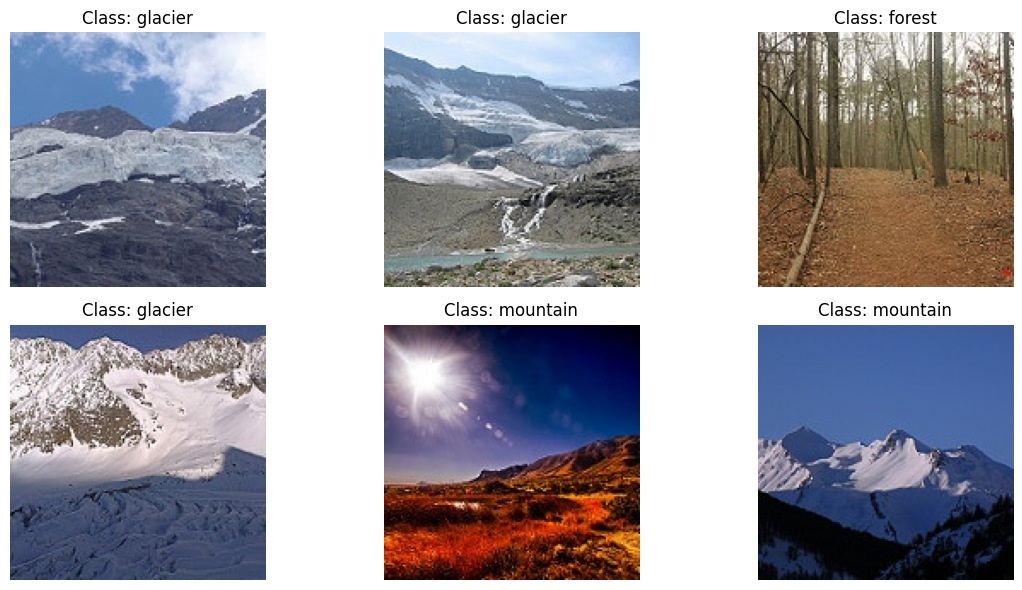

In [3]:
import random

# Show 6 random train images
plt.figure(figsize=(12, 6))

for i in range(6):
    class_name = random.choice(train_classes)
    class_folder = os.path.join(train_path, class_name)
    image_name = random.choice(os.listdir(class_folder))
    image_path = os.path.join(class_folder, image_name)
    
    img = Image.open(image_path)
    
    plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Class: {class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [5]:
from PIL import ImageEnhance, ImageOps

def horizontal_flip(img):
    return img.transpose(Image.FLIP_LEFT_RIGHT)

def random_rotation(img, degrees=15):
    return img.rotate(degrees)

def brighten(img, factor=1.4):
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(factor)

def darken(img, factor=0.2):
    enhancer = ImageEnhance.Brightness(img)
    return enhancer.enhance(factor)

In [6]:
import os
import random
from PIL import Image
from tqdm import tqdm

input_dir = "/kaggle/input/intel-image-classification/seg_train/seg_train"
augmented_dir = "/kaggle/working/seg_train_augmented"

os.makedirs(augmented_dir, exist_ok=True)

augmentation_funcs = [horizontal_flip, random_rotation, brighten, darken]

# Loop through each class folder
for class_name in os.listdir(input_dir):
    class_input_path = os.path.join(input_dir, class_name)
    class_output_path = os.path.join(augmented_dir, class_name)
    os.makedirs(class_output_path, exist_ok=True)

    image_names = os.listdir(class_input_path)
    random.shuffle(image_names)
    
    # Copy original images first
    for img_name in image_names:
        img = Image.open(os.path.join(class_input_path, img_name))
        img.save(os.path.join(class_output_path, img_name))
    
    # Apply augmentations to 10% of images
    n = len(image_names)
    augment_count = int(n * 0.1)
    for img_name in tqdm(image_names[:augment_count], desc=f"Augmenting {class_name}"):
        img_path = os.path.join(class_input_path, img_name)
        img = Image.open(img_path)

        for i, func in enumerate(random.sample(augmentation_funcs, 2)):  # Pick 2 augmentations
            aug_img = func(img)
            aug_name = img_name.replace(".jpg", f"_aug{i}.jpg").replace(".png", f"_aug{i}.png")
            aug_img.save(os.path.join(class_output_path, aug_name))

Augmenting glacier: 100%|██████████| 240/240 [00:00<00:00, 510.83it/s]


In [ ]:
import glob

def count_images(folder_path):
    total = 0
    class_counts = {}
    for class_name in os.listdir(folder_path):
        image_files = glob.glob(os.path.join(folder_path, class_name, "*"))
        class_counts[class_name] = len(image_files)
        total += len(image_files)
    return total, class_counts

original_total, original_classes = count_images(input_dir)
augmented_total, augmented_classes = count_images(augmented_dir)

print("Original Dataset Size:", original_total)
print("Augmented Dataset Size:", augmented_total)
print("Sample Class Counts (After Aug):", augmented_classes)

Original Dataset Size: 14034
Augmented Dataset Size: 16838
Sample Class Counts (After Aug): {'sea': 2728, 'mountain': 3014, 'buildings': 2629, 'glacier': 2884, 'forest': 2725, 'street': 2858}


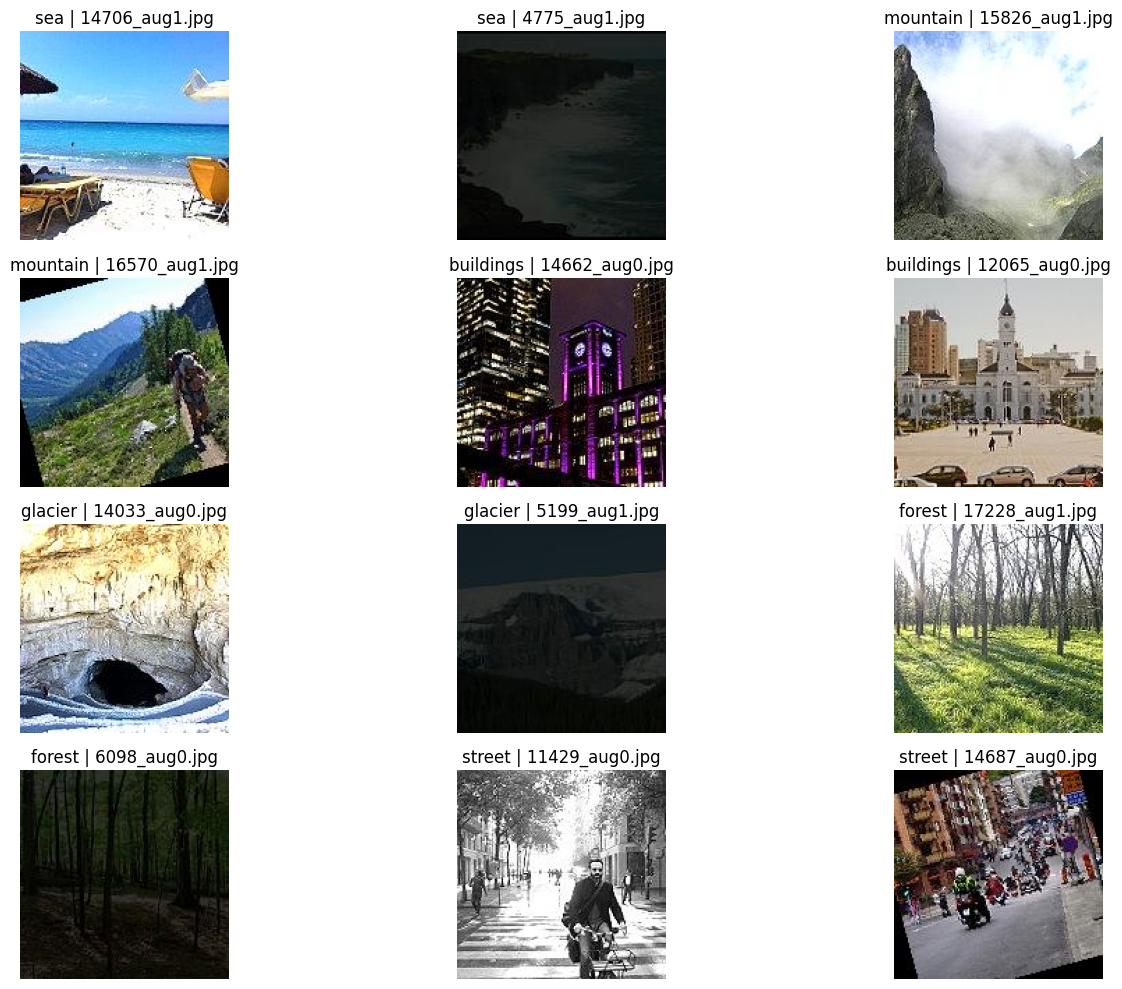

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

augmented_base_path = "/kaggle/working/seg_train_augmented"
classes = os.listdir(augmented_base_path)

plt.figure(figsize=(15, 10))

i = 1
for class_name in classes:
    class_path = os.path.join(augmented_base_path, class_name)
    
    # Show 1 original + 1 or 2 augmented image(s)
    images = [img for img in os.listdir(class_path) if "_aug" in img]
    if len(images) == 0:
        continue
    
    random.shuffle(images)
    for img_name in images[:2]:  # Show 2 augmented images per class
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        plt.subplot(4, 3, i)
        plt.imshow(img)
        plt.title(f"{class_name} | {img_name}")
        plt.axis('off')
        i += 1

plt.tight_layout()
plt.show()

In [9]:
import shutil
from tqdm import tqdm

original_path = "/kaggle/input/intel-image-classification/seg_train/seg_train"
augmented_path = "/kaggle/working/seg_train_augmented"
combined_path = "/kaggle/working/seg_train_combined"

# Create combined structure
os.makedirs(combined_path, exist_ok=True)
for class_name in os.listdir(original_path):
    os.makedirs(os.path.join(combined_path, class_name), exist_ok=True)

# Copy original images
for class_name in tqdm(os.listdir(original_path), desc="Copying original"):
    src = os.path.join(original_path, class_name)
    dst = os.path.join(combined_path, class_name)
    for fname in os.listdir(src):
        shutil.copy(os.path.join(src, fname), os.path.join(dst, fname))

# Copy augmented images
for class_name in tqdm(os.listdir(augmented_path), desc="Copying augmented"):
    src = os.path.join(augmented_path, class_name)
    dst = os.path.join(combined_path, class_name)
    for fname in os.listdir(src):
        if "_aug" in fname:
            shutil.copy(os.path.join(src, fname), os.path.join(dst, fname))

Copying augmented: 100%|██████████| 6/6 [00:00<00:00, 22.38it/s]


In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


# Redefine paths
train_dir = combined_path
test_dir = "/kaggle/input/intel-image-classification/seg_test/seg_test"

# Transforms (same as before)
common_transforms = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Reload datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=common_transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=common_transforms)

# Reload DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Final confirmation
print("Final Combined Train Set Size:", len(train_dataset))

Final Combined Train Set Size: 16838


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

def train_model_with_metrics(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=30, patience=5):
    # Initialize lists to track metrics
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_model_wts = model.state_dict()
    best_acc = 0.0
    early_stop_counter = 0

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch+1}/{num_epochs}")
        print("-" * 30)

        # Training phase
        model.train()
        running_loss = 0.0
        running_corrects = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
            total_train += labels.size(0)

        epoch_loss = running_loss / total_train
        epoch_acc = running_corrects.double() / total_train
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc.item())

        print(f"Train Loss: {epoch_loss:.4f} | Train Accuracy: {epoch_acc:.4f}")

        # Validation phase
        model.eval()
        val_loss = 0.0
        val_corrects = 0
        total_val = 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * inputs.size(0)
                val_corrects += torch.sum(preds == labels.data)
                total_val += labels.size(0)

        val_epoch_loss = val_loss / total_val
        val_epoch_acc = val_corrects.double() / total_val
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_acc.item())

        print(f"Val Loss: {val_epoch_loss:.4f} | Val Accuracy: {val_epoch_acc:.4f}")

        scheduler.step(val_epoch_loss)

        # Save best model
        if val_epoch_acc > best_acc:
            best_acc = val_epoch_acc
            best_model_wts = model.state_dict()
            torch.save(model.state_dict(), f"best_model_{model.__class__.__name__}.pt")
            print("✔️ New best model saved.")
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print("⛔ Early stopping triggered.")
                break

    model.load_state_dict(best_model_wts)
    
    # Plot metrics after training
    plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)
    return model


def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    # Plot loss and accuracy curves
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Loss Curve
    ax[0].plot(train_losses, label="Train Loss")
    ax[0].plot(val_losses, label="Val Loss")
    ax[0].set_title('Loss Curve')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend()

    # Accuracy Curve
    ax[1].plot(train_accuracies, label="Train Accuracy")
    ax[1].plot(val_accuracies, label="Val Accuracy")
    ax[1].set_title('Accuracy Curve')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class AlexNet150(nn.Module):
    def __init__(self, num_classes=6):
        super(AlexNet150, self).__init__()
        
        # Convolutional layers
        self.features = nn.Sequential(
            # Input: (3, 150, 150)
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),  # → (64, 37, 37)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                   # → (64, 18, 18)

            nn.Conv2d(64, 192, kernel_size=5, padding=2),            # → (192, 18, 18)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),                   # → (192, 8, 8)

            nn.Conv2d(192, 384, kernel_size=3, padding=1),           # → (384, 8, 8)
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),           # → (256, 8, 8)
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),           # → (256, 8, 8)
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)                    # → (256, 3, 3)
        )

        # Classifier (fully connected layers)
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 3 * 3, 1024),  # reduced from 4096 to 1024 for lightweight
            nn.ReLU(inplace=True),

            nn.Dropout(),
            nn.Linear(1024, 512),         # another lightweight layer
            nn.ReLU(inplace=True),

            nn.Linear(512, num_classes)   # final output layer
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.classifier(x)
        return x


Epoch 1/30
------------------------------
Train Loss: 1.2421 | Train Accuracy: 0.4869
Val Loss: 1.1904 | Val Accuracy: 0.5580
✔️ New best model saved.

Epoch 2/30
------------------------------
Train Loss: 1.0349 | Train Accuracy: 0.5948
Val Loss: 0.9248 | Val Accuracy: 0.6397
✔️ New best model saved.

Epoch 3/30
------------------------------
Train Loss: 0.9470 | Train Accuracy: 0.6392
Val Loss: 0.9654 | Val Accuracy: 0.6420
✔️ New best model saved.

Epoch 4/30
------------------------------
Train Loss: 0.8737 | Train Accuracy: 0.6718
Val Loss: 0.8145 | Val Accuracy: 0.6950
✔️ New best model saved.

Epoch 5/30
------------------------------
Train Loss: 0.8092 | Train Accuracy: 0.7020
Val Loss: 0.7885 | Val Accuracy: 0.7253
✔️ New best model saved.

Epoch 6/30
------------------------------
Train Loss: 0.7607 | Train Accuracy: 0.7254
Val Loss: 0.7036 | Val Accuracy: 0.7587
✔️ New best model saved.

Epoch 7/30
------------------------------
Train Loss: 0.7197 | Train Accuracy: 0.7385
V

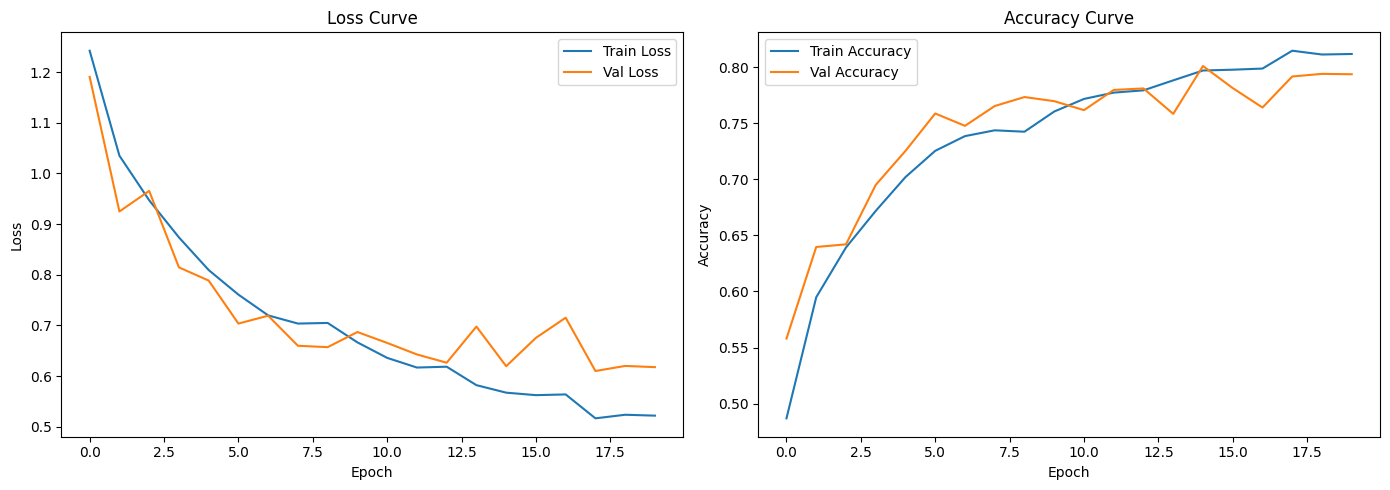

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate the model
alexnet_model = AlexNet150(num_classes=6).to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet_model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', patience=2, factor=0.5, verbose=True)

# Train the model using the utility we defined
trained_alexnet = train_model_with_metrics(
    model=alexnet_model,
    train_loader=train_loader,
    val_loader=test_loader,  # You can optionally split train set into train/val
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    device=device,
    num_epochs=30,
    patience=5
)

In [18]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Load the best saved model
best_model_path = 'best_model_AlexNet150.pt'
best_model = AlexNet150(num_classes=6).to(device)
best_model.load_state_dict(torch.load(best_model_path))
best_model.eval()

# Evaluate the model on the test set
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = best_model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate the accuracy
test_accuracy = accuracy_score(all_labels, all_preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=test_loader.dataset.classes))

/tmp/ipykernel_31/2977970245.py:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  best_model.load_state_dict(torch.load(best_model_path))


Test Accuracy: 0.8010

Classification Report:
              precision    recall  f1-score   support

   buildings       0.74      0.75      0.75       437
      forest       0.95      0.86      0.90       474
     glacier       0.82      0.73      0.78       553
    mountain       0.76      0.80      0.78       525
         sea       0.74      0.85      0.79       510
      street       0.82      0.82      0.82       501

    accuracy                           0.80      3000
   macro avg       0.81      0.80      0.80      3000
weighted avg       0.81      0.80      0.80      3000



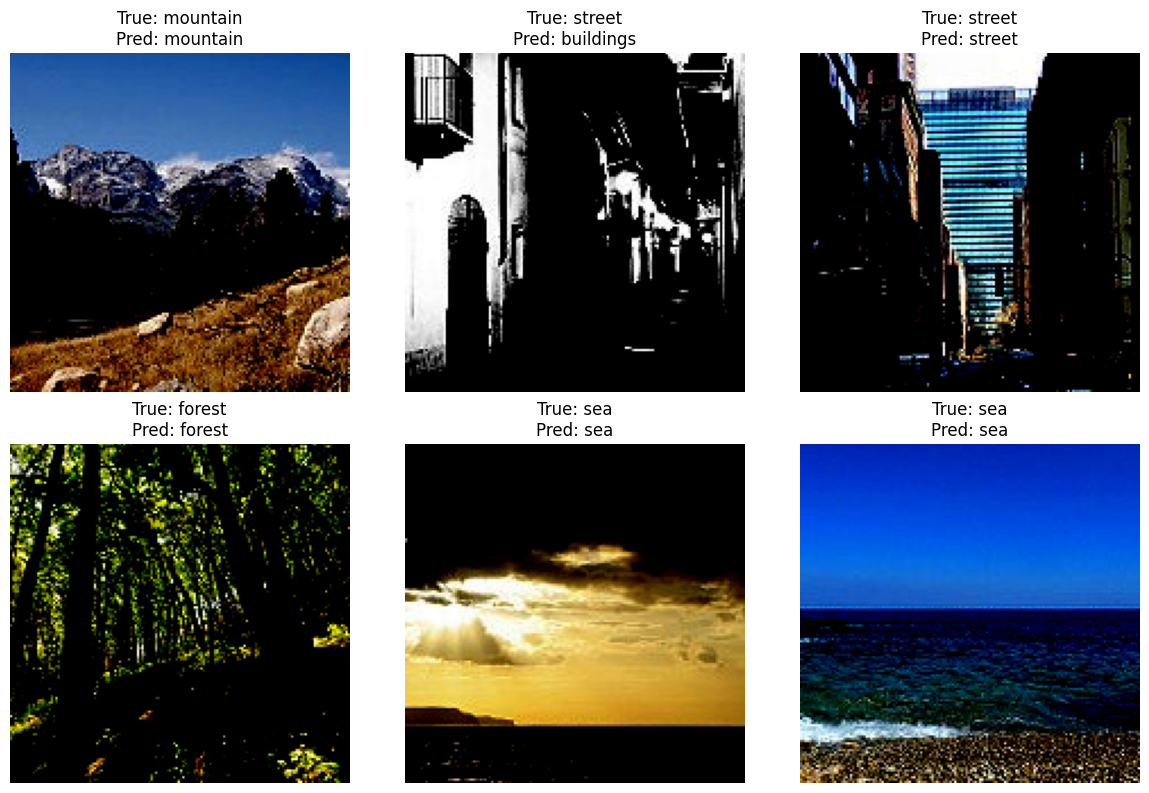

In [19]:
import random
import matplotlib.pyplot as plt
from PIL import Image

# Get 6 random samples from the test set
random_indices = random.sample(range(len(test_loader.dataset)), 6)
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, idx in enumerate(random_indices):
    # Load the image and its true label
    img, true_label = test_loader.dataset[idx]
    true_class = test_loader.dataset.classes[true_label]
    
    # Predict the label
    img = img.unsqueeze(0).to(device)
    output = best_model(img)
    _, predicted_label = torch.max(output, 1)
    predicted_class = test_loader.dataset.classes[predicted_label.item()]

    # Plotting
    ax = axes[i//3, i%3]
    ax.imshow(np.array(img.squeeze(0).cpu().permute(1, 2, 0)))
    ax.set_title(f"True: {true_class}\nPred: {predicted_class}")
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import torch.nn as nn

# --------------------------
# Model Definition
# --------------------------
class AlexNet150(nn.Module):
    def __init__(self, num_classes=6):
        super(AlexNet150, self).__init__()
        
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 3 * 3, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

# --------------------------
# Inference Function
# --------------------------
def predict_image(image_path, model_path, class_names):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load model
    model = AlexNet150(num_classes=len(class_names))
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)
    model.eval()

    # Preprocessing
    transform = transforms.Compose([
        transforms.Resize((150, 150)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ])

    # Load and preprocess image
    img = Image.open(image_path).convert('RGB')
    input_tensor = transform(img).unsqueeze(0).to(device)

    # Predict
    with torch.no_grad():
        output = model(input_tensor)
        _, pred = torch.max(output, 1)

    predicted_class = class_names[pred.item()]

    # Display result
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

# --------------------------
# Example usage
# --------------------------
if __name__ == "__main__":
    # Modify the path and class names as needed
    class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
    image_path = "OIP.jpeg"  # Replace with your image path
    model_path = "best_model_AlexNet150.pt"  # Replace with your model path

    predict_image(image_path, model_path, class_names)
